#Upload file to google colab environtment



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving import.txt to import.txt


In [ ]:
#read

f = open("import.txt","r")
print(f.read())
f.close()

hallo 
ini cara import
ke google collab


In [ ]:
#write

from google.colab import files

fw= open("file3.txt", "w")
fw.write("isi 1 \n")
fw.write("isi 2")
fw.close()

files.download('file3.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#add 

from google.colab import files

fw= open("file3.txt", "a")
fw.write("tambahan 1 \n")
fw.write(" tambahan 2")

fw.close()

files.download('file3.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Connection to Postgres

In [ ]:
pip install psycopg2

#Test koneksi ke database Postgres AWS

In [ ]:
import psycopg2

try:
  connection = psycopg2.connect(user='ds5_3',
                                password='c1d090696b66b77f0fe1f48bfafa9641',
                                host='digitalskoladb.c04me33o8tni.ap-southeast-1.rds.amazonaws.com',
                                port='5432',
                                database='sandbox')

  print('koneksi sukses')
except:
  print('koneksi gagal')

koneksi sukses


In [ ]:
import psycopg2

def get_connection():
  try:
    connection = psycopg2.connect(user='ds5_3',
                                password='c1d090696b66b77f0fe1f48bfafa9641',
                                host='digitalskoladb.c04me33o8tni.ap-southeast-1.rds.amazonaws.com',
                                port='5432',
                                database='sandbox')

    print('koneksi sukses')
    return connection
  except:
    print('koneksi gagal')

get_connection()

koneksi sukses


<connection object at 0x7f3494645690; dsn: 'user=ds5_3 password=xxx dbname=sandbox host=digitalskoladb.c04me33o8tni.ap-southeast-1.rds.amazonaws.com port=5432', closed: 0>

In [ ]:
def close_connection(connection):
  if connection:
    connection.close()
    print('koneksi selesai')


#Select Data

In [ ]:
connection = get_connection()

cursor = connection.cursor()
select_query = """select a.id_pegawai, a.nama, a.no_ktp, a.alamat, b.nama, b.gaji
                  from batch_5.pegawai a
                  join batch_5.pekerjaan b
                  on
                  a.id_pekerjaan = b.id_pekerjaan"""

cursor.execute(select_query)
records = cursor.fetchall()

print('Menampilkan pegawai')
print('----------------')

i = 1
for row in records:
  print('Pegawai ID : ', row[0])
  print('Nama : ', row[1])
  print('No KTP : ', row[2])
  print('Alamat : ', row[3])
  print('Pekerjaan :', row[4])
  print('Gaji : ', row[5])
  print('')
  i = i+1

close_connection(connection)



In [ ]:
#insert new data

connection = get_connection()
cursor = connection.cursor()

select_query = """insert into batch_5.pegawai (id_pegawai, nama, no_ktp, alamat, id_pekerjaan)
              values (222, 'joe', 2222, 'jakarta', 2)"""

cursor.execute(select_query)
connection.commit()
print('sukses menambah data')
close_connection=(connection)

koneksi sukses
sukses menambah data


In [ ]:
#update

connection = get_connection()
cursor = connection.cursor()

select_query = """update batch_5.pegawai set nama='joe' where id_pegawai='222'"""

cursor.execute(select_query)
connection.commit()
print('sukses update data')
close_connection=(connection)

koneksi sukses
sukses update data


In [ ]:
#delete 

connection = get_connection()
cursor = connection.cursor()

select_query = """delete from batch_5.pegawai where id_pegawai=222"""

cursor.execute(select_query)
connection.commit()
print('sukses hapus data')
close_connection=(connection)

koneksi sukses
sukses hapus data


In [ ]:
#Visualization

connection = get_connection()

cursor = connection.cursor()
select_query = """select id_pekerjaan, nama, gaji from batch_5.pekerjaan"""

cursor.execute(select_query)
records = cursor.fetchall()

print('Menampilkan pekerjaan')
print('----------------')

i = 1
list_pekerjaan = []
for row in records:
  print('Data ke : ', i)
  print('id pekerjaan : ', row[0])
  print('Nama Perkerjaan : ', row[1])
  print('Gaji : ', row[2])

  data = [row[0], row[1], row[2]]
  list_pekerjaan.append(data)

  print('')
  i = i+1

close_connection(connection)

koneksi sukses
Menampilkan pekerjaan
----------------
Data ke :  1
id pekerjaan :  1
Nama Perkerjaan :  IT developer
Gaji :  3000.0

Data ke :  2
id pekerjaan :  2
Nama Perkerjaan :  Manager
Gaji :  4000.0

Data ke :  3
id pekerjaan :  3
Nama Perkerjaan :  Security
Gaji :  1000.0

koneksi selesai


In [ ]:
list_pekerjaan

[[1, 'IT developer', 3000.0], [2, 'Manager', 4000.0], [3, 'Security', 1000.0]]

In [ ]:
list_pekerjaan[0][2]

3000.0

In [ ]:
for i in list_pekerjaan:
  print(i)

[1, 'IT developer', 3000.0]
[2, 'Manager', 4000.0]
[3, 'Security', 1000.0]


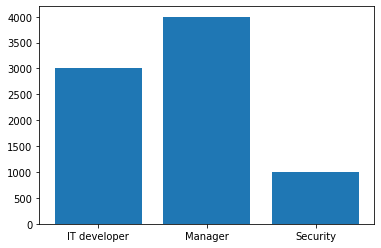

In [ ]:
#start visualisasi

import matplotlib.pyplot as plt

pekerjaan = [i[1] for i in list_pekerjaan]
gaji = [i[2] for i in list_pekerjaan]

plt.bar(pekerjaan, gaji)
plt.show()
